Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Number of dup

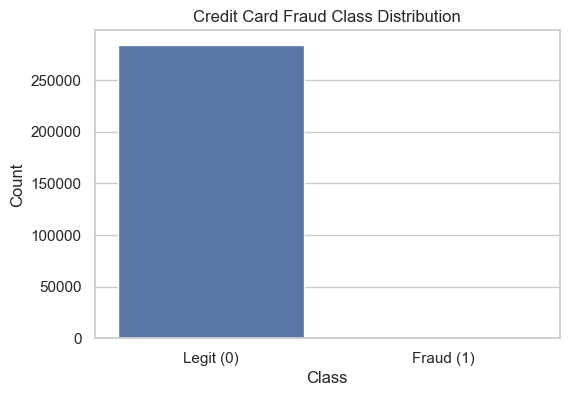

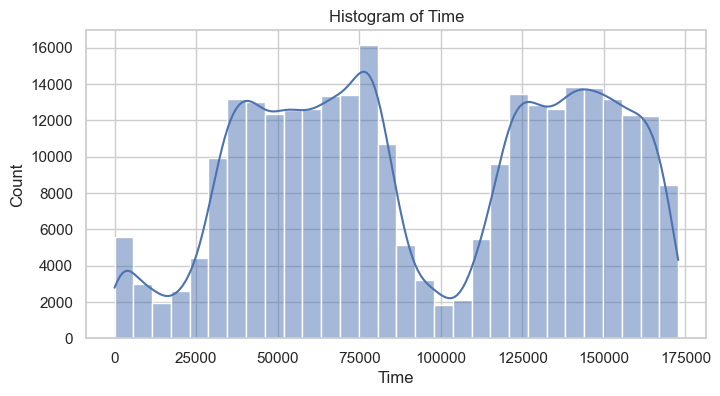

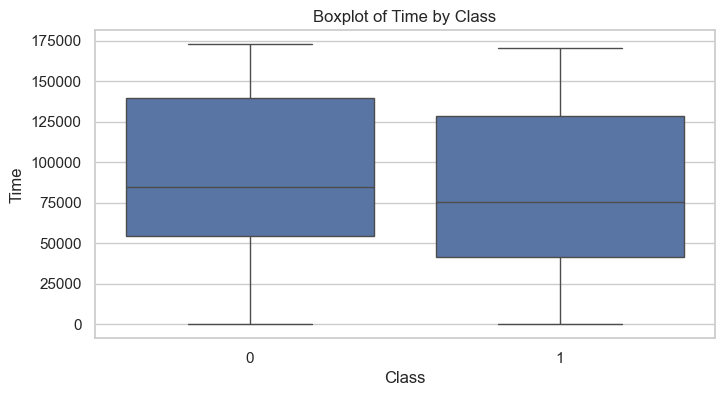

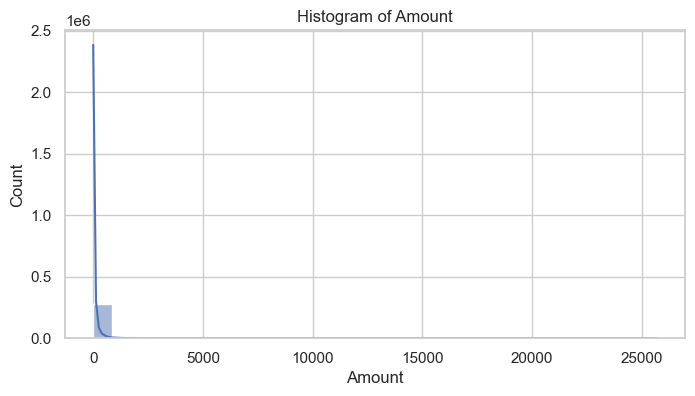

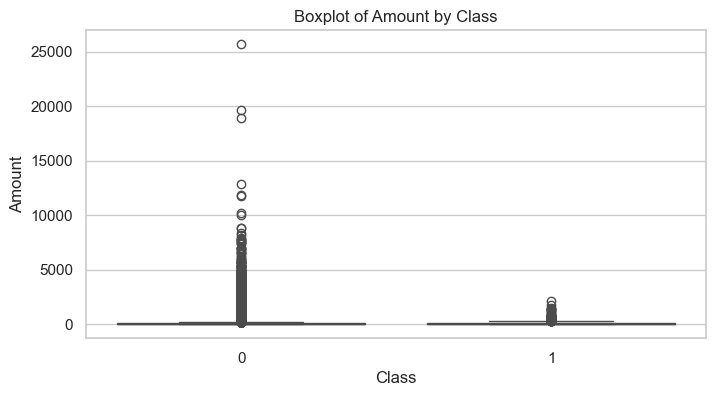

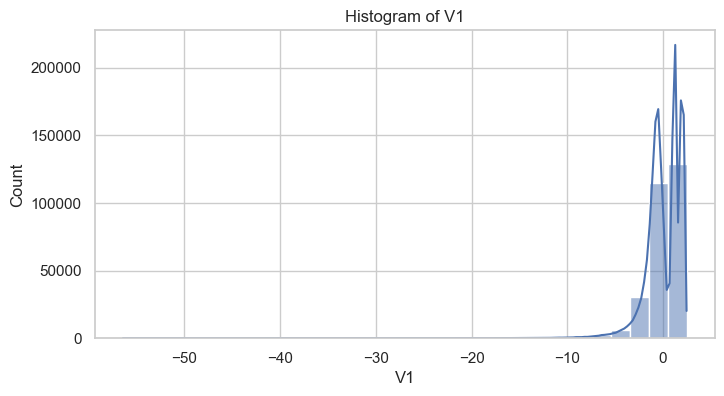

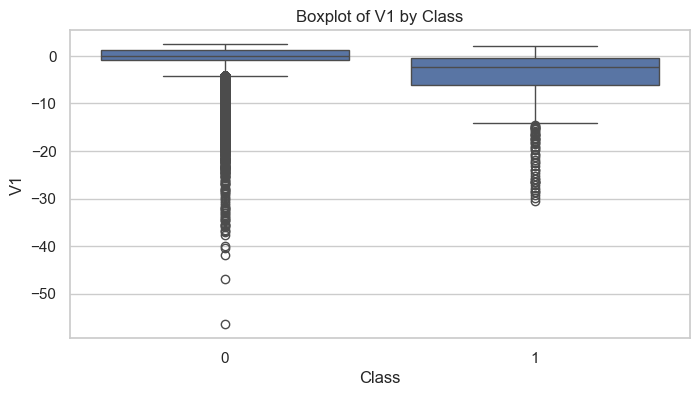

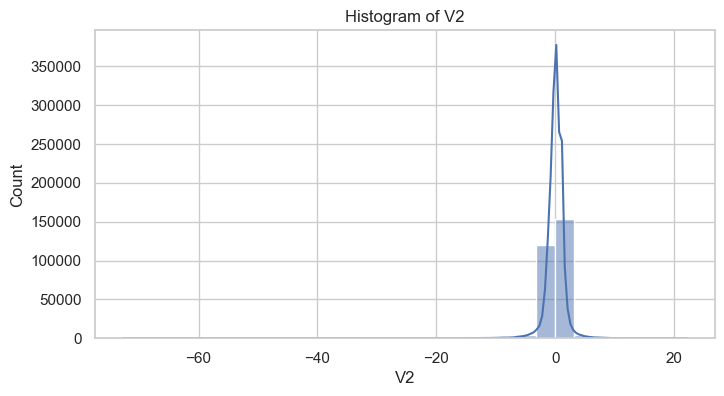

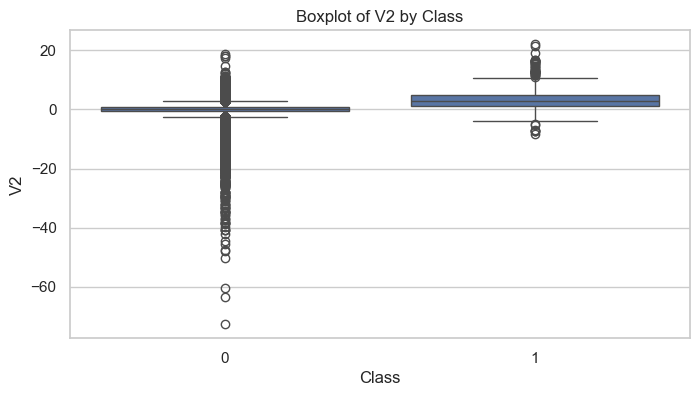

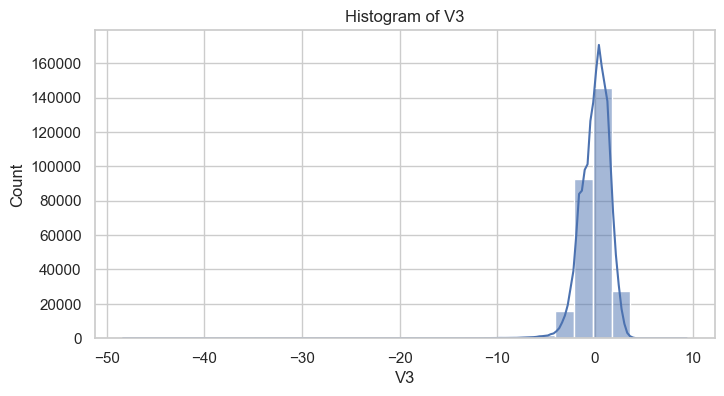

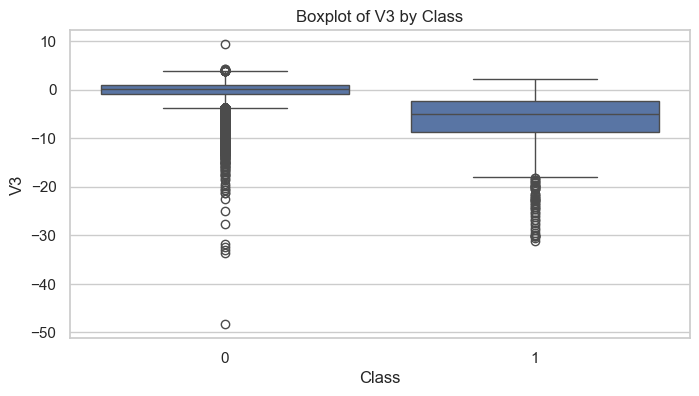

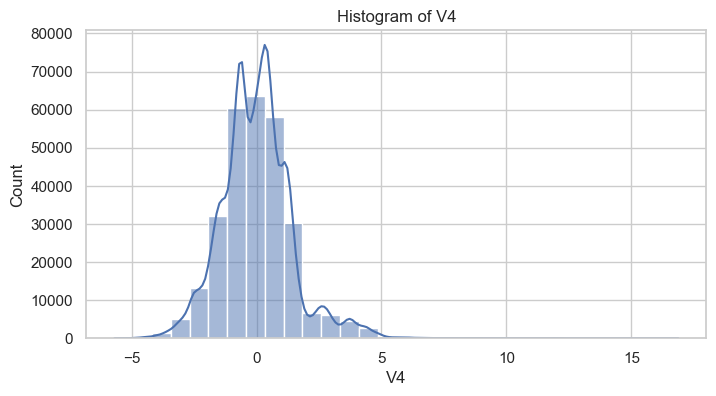

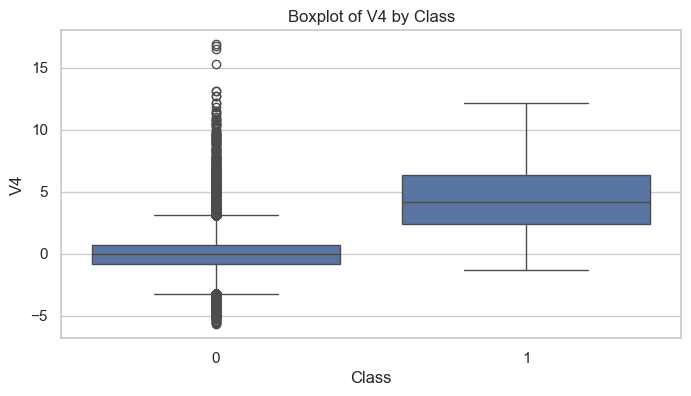

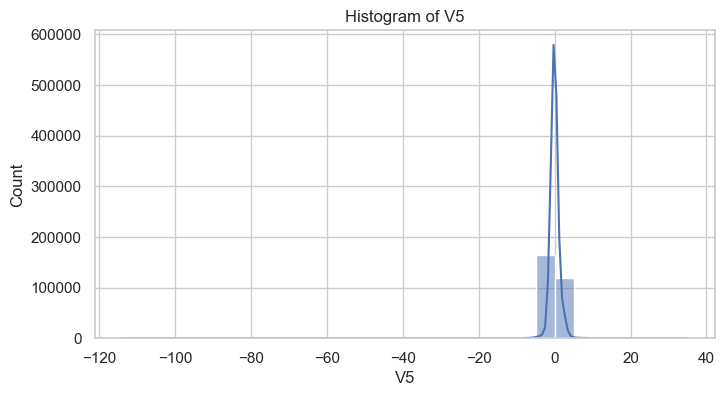

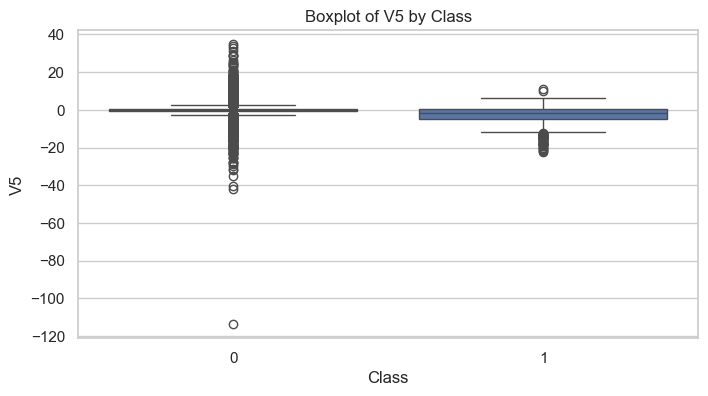

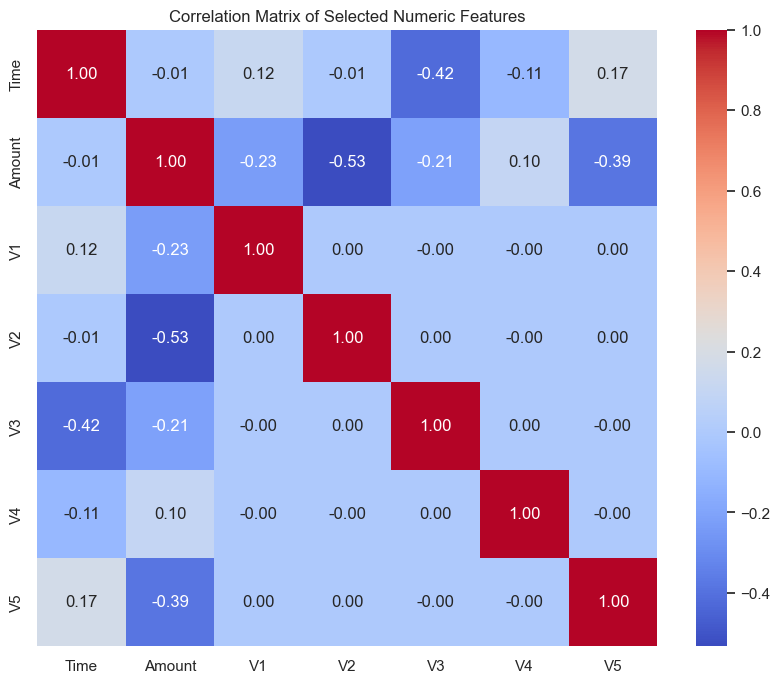

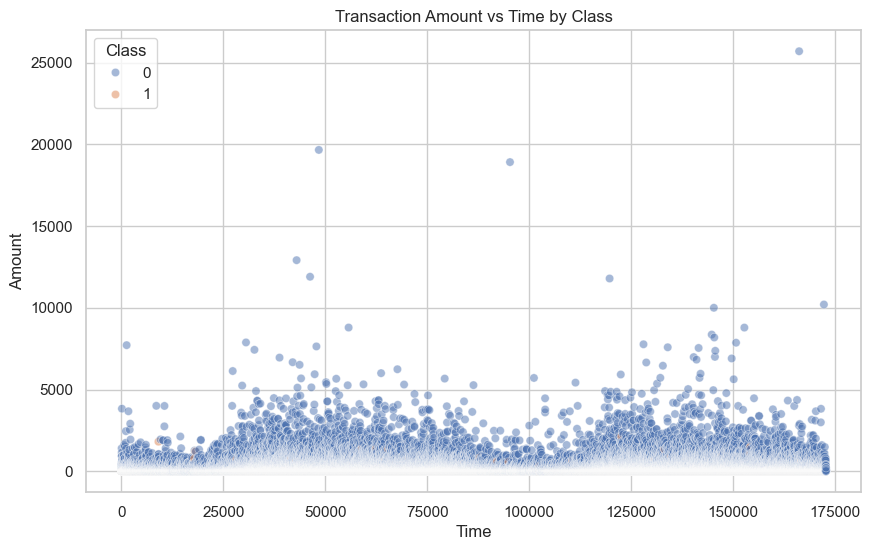

In [2]:
# eda-creditcard.ipynb

# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

# -----------------------------
# 2. Load Data
# -----------------------------
# Adjust path for your current working directory
credit_df = pd.read_csv("../data/raw/credit_card.csv")

# Quick look
credit_df.head()

# -----------------------------
# 3. Data Cleaning Checks
# -----------------------------
# Check data types
print("Data Types:")
print(credit_df.dtypes)

# Check missing values
print("\nMissing Values:")
print(credit_df.isna().sum())

# Check duplicates
duplicates = credit_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# -----------------------------
# 4. Class Distribution
# -----------------------------
# Counts and percentages
class_counts = credit_df['Class'].value_counts()
class_percent = credit_df['Class'].value_counts(normalize=True) * 100

print("\nClass Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percent)

# Barplot
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Credit Card Fraud Class Distribution")
plt.xticks([0,1], ['Legit (0)', 'Fraud (1)'])
plt.ylabel("Count")
plt.show()

# -----------------------------
# 5. Univariate Analysis
# -----------------------------
# Numeric features: Amount, Time, plus a few PCA features
numeric_features = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5']

for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(credit_df[feature], kde=True, bins=30)
    plt.title(f"Histogram of {feature}")
    plt.show()

    plt.figure(figsize=(8,4))
    sns.boxplot(x='Class', y=feature, data=credit_df)
    plt.title(f"Boxplot of {feature} by Class")
    plt.show()

# -----------------------------
# 6. Bivariate Analysis
# -----------------------------
# Plot correlations between top numeric features
plt.figure(figsize=(10,8))
sns.heatmap(credit_df[numeric_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Selected Numeric Features")
plt.show()

# Scatterplot: Amount vs Time colored by Class
plt.figure(figsize=(10,6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=credit_df, alpha=0.5)
plt.title("Transaction Amount vs Time by Class")
plt.show()


